In [1]:
import pandas as pd

## Read in and format dataframe

In [2]:
data = pd.read_csv('catskills_tmax.csv',                    # read in dataframe
                   na_values=99999.0,                       # convert all 99999.0 values to NaN
                   parse_dates={'date':['year','m','d']})   # parse the numbers in these three columns into  a single 'date' column

In [3]:
data.dropna(thresh=3,inplace=True) # drop all rows with fewer than 3 non-NaN values 

data = data.drop(data[data.date=='1900 2 29'].index) # drop this row because 1900 was not a leap year and was messing up the datetime conversion

data['date'] = pd.to_datetime(data['date']) # convert the dates to datetime objects

data = data.drop(['doy'],axis=1) # drop the unneeded 'doy' column

data.set_index('date', inplace=True) # set date column to be the index

In [4]:
data.head() # view the formatted dataframe

,ALBANY,ALCOVE,BINGHAMTON,COOPERSTOWN,DELHI,DEPOSIT,LIBERTY,MIDDLETOWN,MOHONK,PORT,SLIDE_PH,WEST
date,,,,,,,,,,,,
1890-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3333
1890-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2222
1890-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.4444
1890-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.1111
1890-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3333


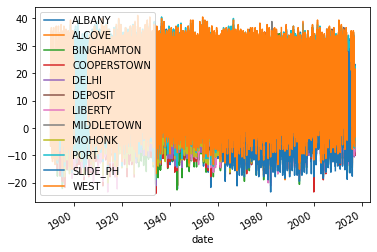

In [5]:
ax=data.plot() # plot entire dataframe and recoil in horror

## Plot Just the Temperatures in Albany in 1999

In [6]:
jan_1999 = data.index >= '19990101'         # select only rows after 1/1/1999
dec_1999 = data.index <= '19991231'         # select only rows before 12/31/1999
year_1999 = data[jan_1999 & dec_1999]       # select rows between the above parameters      

In [7]:
year_1999    # view new dataframe containing data for only 1999

,ALBANY,ALCOVE,BINGHAMTON,COOPERSTOWN,DELHI,DEPOSIT,LIBERTY,MIDDLETOWN,MOHONK,PORT,SLIDE_PH,WEST
date,,,,,,,,,,,,
1999-01-01,-6.1111,-5.5556,-9.4444,-8.8889,-7.2222,-7.2222,-6.1111,-5.5556,-6.1111,-3.8889,-9.4444,-4.4444
1999-01-02,-12.2222,-6.6667,-8.8889,-8.8889,-8.8889,-9.4444,-8.3333,-7.2222,-10.5556,-7.7778,-10.0000,-4.4444
1999-01-03,2.2222,-7.2222,2.7778,4.4444,4.4444,3.3333,-4.4444,2.2222,2.7778,3.3333,1.6667,0.0000
1999-01-04,-1.1111,0.5556,-6.6667,-0.5556,7.2222,1.1111,2.7778,3.8889,3.3333,2.7778,7.7778,6.6667
1999-01-05,-4.4444,-4.4444,-7.7778,-5.5556,-6.1111,-5.5556,-6.6667,3.8889,-4.4444,-4.4444,-7.7778,-3.3333
...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-27,-2.7778,-0.5556,-5.5556,-5.5556,-2.2222,-2.7778,-1.1111,1.1111,-1.6667,0.0000,-3.3333,2.2222
1999-12-28,-5.0000,-2.7778,-7.2222,-5.5556,-4.4444,-3.3333,-5.5556,-1.1111,-3.3333,-1.6667,-3.3333,2.2222
1999-12-29,0.0000,-5.5556,-2.7778,-6.1111,-6.1111,-2.2222,-7.2222,0.0000,-1.1111,0.5556,-8.3333,-3.8889


In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 6]     # increase default size of the plots

Text(0, 0.5, 'Temperature (C)')

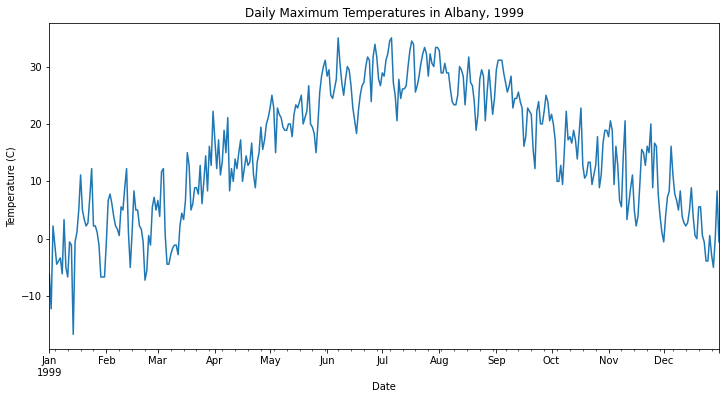

In [ ]:
ax = year_1999['ALBANY'].plot(title='Daily Maximum Temperatures in Albany, 1999')       # plot Albany temperatures in 1999
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (C)')

## Plot Maximum Temperatures by Season for Albany, 1999

In [19]:
# define date ranges for each season

winter = data.loc[(data.index >= '19981201') & (data.index < '19990301')]   # winter = Dec 1998 - Feb 1999 
winter_albany = winter['ALBANY']

spring = data.loc[(data.index >= '19990301') & (data.index < '19990601')]   # spring = March - May
spring_albany = spring['ALBANY']

summer = data.loc[(data.index >= '19990601') & (data.index < '19990901')]   # summer = June - August
summer_albany = summer['ALBANY']

fall = data.loc[(data.index >= '19990901') & (data.index < '19991201')]   # fall = Sept - Nov
fall_albany = fall['ALBANY']

In [21]:
# find the max and min temperatures across all seasons to set a common y-axis

y_min = min(winter_albany.min(),spring_albany.min(),summer_albany.min(),fall_albany.min())
y_min = y_min - 5.0

y_max = max(winter_albany.max(),spring_albany.max(),summer_albany.max(),fall_albany.max())
y_max = y_max + 5.0

print(y_min)
print(y_max)

-21.6667
40.0


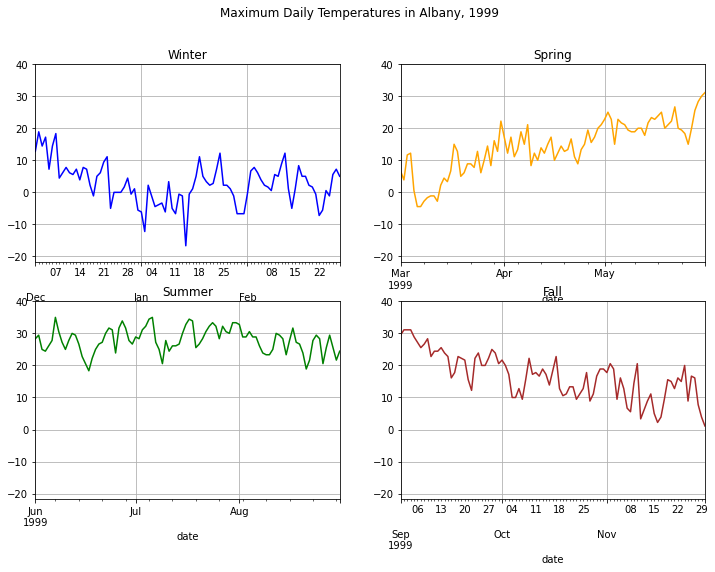

In [27]:
# plot seasonal temperatures 

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))   # set up four axes on a singe figure

ax_winter = axes[0][0]      # assign variables to each axis
ax_spring = axes[0][1]
ax_summer = axes[1][0]
ax_fall = axes[1][1]


line_width = 1.5         # Set common line width


winter_albany.plot(ax=ax_winter, c='blue', lw=line_width,               # plot each axis using previously defined variables
                  ylim=[y_min, y_max], grid=True)
spring_albany.plot(ax=ax_spring, c='orange', lw=line_width,
                  ylim=[y_min, y_max], grid=True)
summer_albany.plot(ax=ax_summer, c='green', lw=line_width,
                  ylim=[y_min, y_max], grid=True)
fall_albany.plot(ax=ax_fall, c='brown', lw=line_width,
                  ylim=[y_min, y_max], grid=True)

fig.suptitle('Maximum Daily Temperatures in Albany, 1999')                    # add titles
ax_winter.title.set_text('Winter')
ax_spring.title.set_text('Spring')
ax_summer.title.set_text('Summer')
ax_fall.title.set_text('Fall')